## Import the required libraries for Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1) Load the data into the data frame

In [4]:
loan_df = pd.read_csv('loan.csv', low_memory=False)

## 2) Display the top 5 rows from dataset to find any exra rows like Header row

In [5]:
loan_df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## 4) Delete unnecessary columns as we are not able to see complete dataset

### Check the shape of complete dataset

In [6]:
loan_df.shape

(39717, 111)

### Check whether any columns values are missing in dataset

In [7]:
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### It seems that most of the columns in the dataset is having all values null because number of rows is equal to sum of null values. Let's identify which columns is having null values.

In [8]:
empty_columns = loan_df.columns[loan_df.isnull().sum() == 39717]
empty_columns

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

### Delete unnecessary columns from dataset

In [9]:
loan_df.drop(empty_columns, axis=1, inplace=True)

### Verify whether columns are deleted or not from original dataset

In [10]:
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [11]:
loan_df.shape

(39717, 57)

### After deleting unnecessary columns from dataset, It is still showing some columns where null values are greater than 70% of actual values. Let's drop those columns from dataset.

In [11]:
loan_df.drop(['mths_since_last_delinq', 'mths_since_last_record','next_pymnt_d','desc','member_id','url','zip_code','tax_liens'], axis=1, inplace=True)

In [104]:
loan_df.shape

(39717, 49)

### The customer behaviour variables are not available at the time of loan application so we can not perform any prediction on it. Let's drop all properties related to customer variables. For example application_type is having only one value that is "INDIVIDUAL".

In [12]:
loan_df.drop(['delinq_2yrs','earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'application_type', 'emp_title'], axis=1, inplace=True)

In [13]:
loan_df.shape

(39717, 27)

In [14]:
loan_df['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

### Identified few more columns and seems that some columns is having only one value. For example : policy_code, acc_now_delinq, initial_list_status, chargeoff_within_12_mths, delinq_amnt. Let's drop those columns.

In [15]:
loan_df.drop(['policy_code','acc_now_delinq','initial_list_status','chargeoff_within_12_mths','delinq_amnt','pymnt_plan','collections_12_mths_ex_med'], axis=1, inplace=True)

In [16]:
loan_df.isnull().sum()

id                         0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                     11
addr_state                 0
dti                        0
pub_rec_bankruptcies     697
dtype: int64

In [17]:
loan_df['title'] = loan_df['title'].fillna(loan_df['title'].mode()[0])

In [18]:
loan_df['emp_length'] = loan_df['emp_length'].fillna(loan_df.emp_length.mode()[0])

In [19]:
loan_df['pub_rec_bankruptcies'] = loan_df['pub_rec_bankruptcies'].fillna('Unknown')

In [20]:
loan_df.isnull().sum()

id                      0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64

### The ones marked 'Current' are neither fully paid not defaulted, so drop those records with status 'Current'. 

In [21]:
loan_df = loan_df[~(loan_df['loan_status'] == 'Current')]
loan_df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,Home Improvement,CO,11.33,Unknown
39713,90665,8500,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,Retiring credit card debt,NC,6.40,Unknown
39714,90395,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MBA Loan Consolidation,MA,2.30,Unknown
39715,90376,5000,5000,650.0,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,JAL Loan,MD,3.72,Unknown


In [22]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   loan_amnt             38577 non-null  int64  
 2   funded_amnt           38577 non-null  int64  
 3   funded_amnt_inv       38577 non-null  float64
 4   term                  38577 non-null  object 
 5   int_rate              38577 non-null  object 
 6   installment           38577 non-null  float64
 7   grade                 38577 non-null  object 
 8   sub_grade             38577 non-null  object 
 9   emp_length            38577 non-null  object 
 10  home_ownership        38577 non-null  object 
 11  annual_inc            38577 non-null  float64
 12  verification_status   38577 non-null  object 
 13  issue_d               38577 non-null  object 
 14  loan_status           38577 non-null  object 
 15  purpose            

### Univariate Analysis : Draw Boxplot for Annual Income

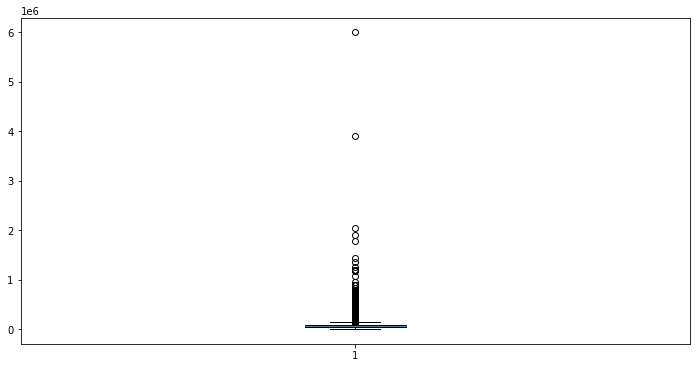

In [23]:
plt.figure(figsize=(12,6))
plt.boxplot(loan_df.annual_inc)
plt.style.use('ggplot')
plt.show()

In [24]:
Q1 = loan_df['annual_inc'].quantile(0.25)
Q3 = loan_df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

42000.0


### Observations : There are outliers for annual income, So we need to remove it

In [25]:
loan_df = loan_df[~((loan_df['annual_inc'] < (Q1 - 1.5 * IQR)) | (loan_df['annual_inc'] > (Q3 + 1.5 * IQR)))]

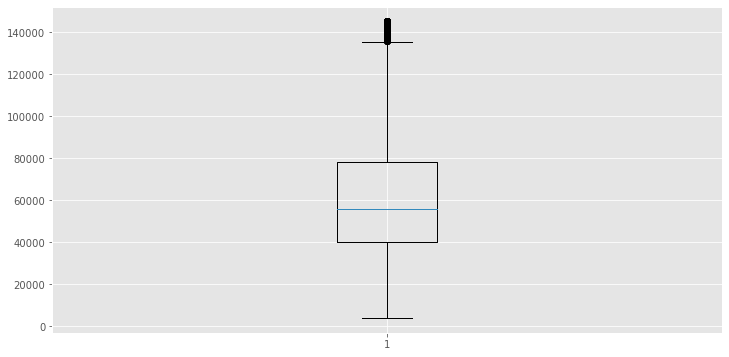

In [26]:
plt.figure(figsize=(12,6))
plt.boxplot(loan_df.annual_inc)
plt.show()

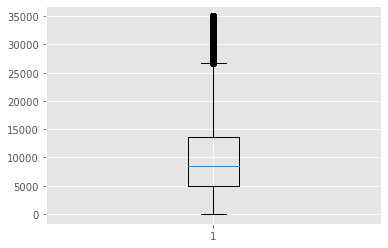

In [28]:
plt.boxplot(loan_df['funded_amnt_inv'])
plt.show()

### It seems the interest rate is having % sign in it. Let's remove it from interest rate column.

In [29]:
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: float(x.replace('%','')))

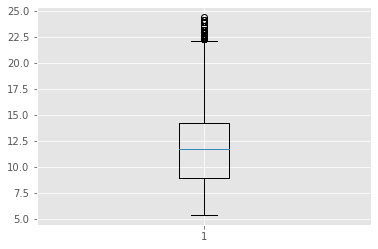

In [30]:
plt.boxplot(loan_df['int_rate'])
plt.show()

In [33]:
loan_df['default'] = loan_df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

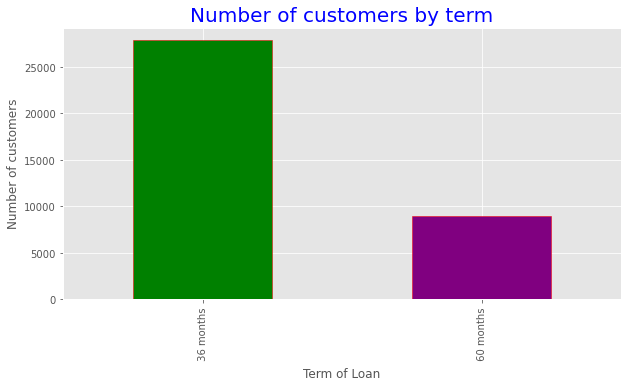

In [34]:
loan_df.term.value_counts().plot(kind='bar', figsize=(10,5), edgecolor='red', color=['green','purple'])
plt.title('Number of customers by term', fontdict={'fontsize':20, 'color':'Blue','fontweight':2})
plt.ylabel('Number of customers')
plt.xlabel('Term of Loan')
plt.show()

### Observation : Most of the customers are preferring 36 months over 60 months.

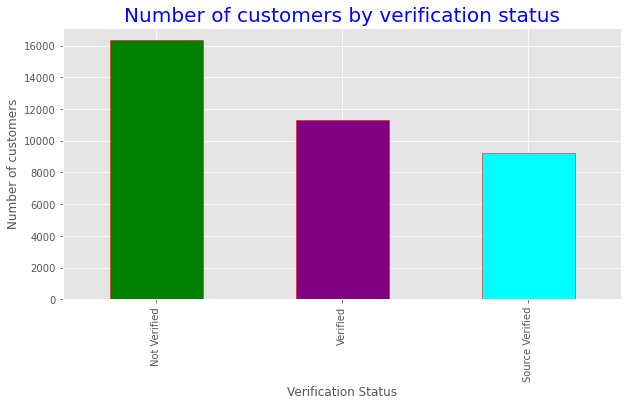

In [127]:
loan_df.verification_status.value_counts().plot(kind='bar', figsize=(10,5), edgecolor='red', color=['green','purple','cyan'])
plt.title('Number of customers by verification status', fontdict={'fontsize':20, 'color':'Blue','fontweight':2})
plt.ylabel('Number of customers')
plt.xlabel('Verification Status')
plt.show()

### Most of the customers verification status is Not Verified followed by Verified

In [35]:
verification_df = loan_df.groupby('verification_status')['loan_status'].value_counts().unstack()
verification_df['ChargedOff_Proportion'] = verification_df['Charged Off']/(verification_df['Charged Off'] + verification_df['Fully Paid'])
verification_df['FullyPaid_Proportion'] = verification_df['Fully Paid']/(verification_df['Charged Off'] + verification_df['Fully Paid'])
verification_df

loan_status,Charged Off,Fully Paid,ChargedOff_Proportion,FullyPaid_Proportion
verification_status,,,,
Not Verified,2099,14221,0.128615,0.871385
Source Verified,1375,7820,0.149538,0.850462
Verified,1957,9343,0.173186,0.826814


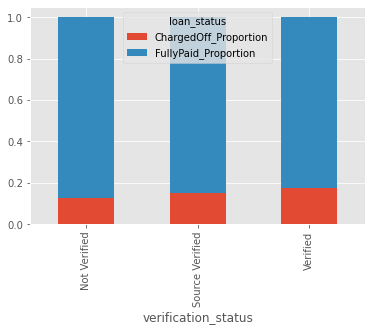

In [36]:
verification_df[['ChargedOff_Proportion','FullyPaid_Proportion']].plot(kind='bar', stacked=True)
plt.show()

### Verified status is having more defaulters as compared to others. Similarly for Not Verified verification status less defaulters.¶

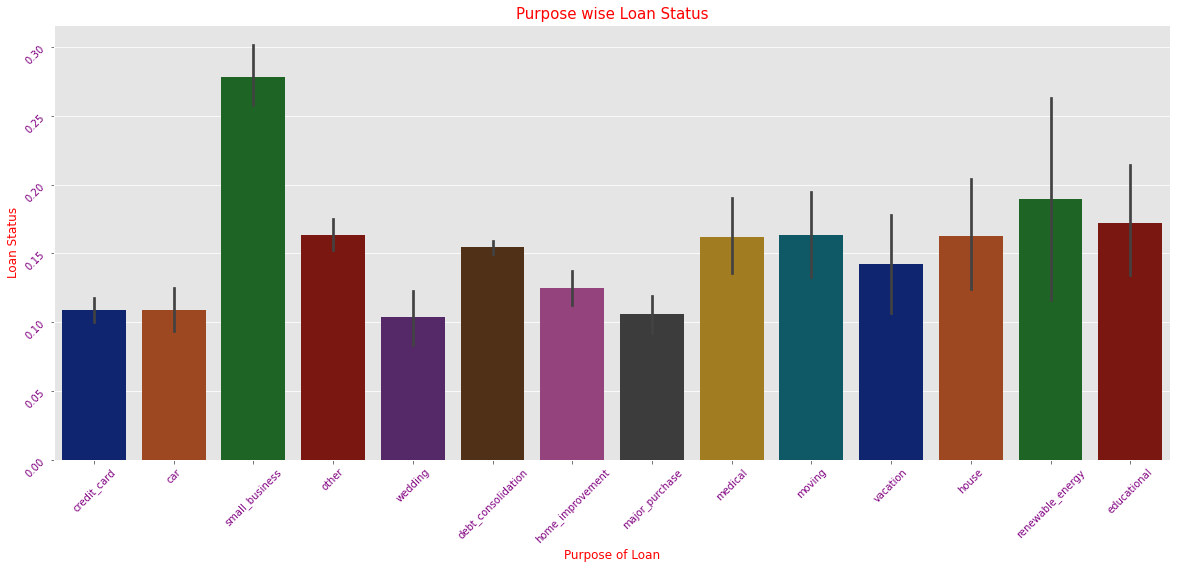

In [129]:
plt.figure(figsize=(20, 8))
plt.xticks(rotation=45, color='Purple')
plt.yticks(rotation=45, color='Purple')
plt.title('Purpose wise Loan Status', fontdict={'fontsize':15, 'color':'Red', 'fontweight':5})
sns.barplot(x='purpose', y='default', data=loan_df, palette='dark')
plt.xlabel("Purpose of Loan", color='Red')
plt.ylabel("Loan Status", color='Red')
plt.show()

### From above we can identify that small business purpose is having large number of Charged Off

In [131]:
grade_vs_loan=loan_df.groupby(['grade','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Fully Paid']
grade_vs_loan['Charged_Off_Proportion']=grade_vs_loan['Charged Off']/grade_vs_loan['Total']
grade_vs_loan.sort_values('Charged_Off_Proportion',ascending=False)

loan_status,grade,Charged Off,Fully Paid,Total,Charged_Off_Proportion
6,G,96,171,267,0.359551
5,F,291,599,890,0.326966
4,E,662,1798,2460,0.269106
3,D,1083,3773,4856,0.223023
2,C,1326,6180,7506,0.176659
1,B,1380,9772,11152,0.123745
0,A,593,9091,9684,0.061235


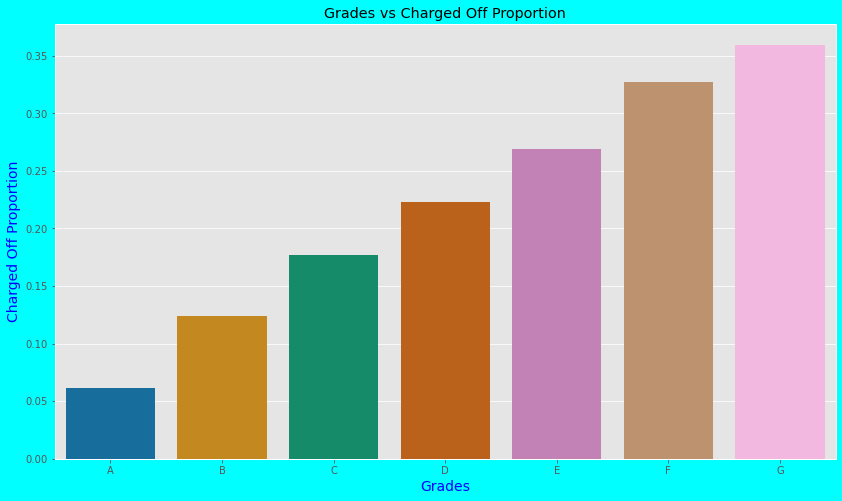

In [141]:
fig,ax1=plt.subplots(figsize=(14,8),facecolor='cyan')
ax1.set(title='Grades vs Charged Off Proportion')
ax1=sns.barplot(x='grade',y='Charged_Off_Proportion', data=grade_vs_loan, palette='colorblind')
ax1.set_xlabel('Grades', fontsize=14, color='b')
ax1.set_ylabel('Charged Off Proportion',fontsize=14, color='b')
plt.show()

### 1) Grade G has highest number of defaulters.
### 2) Defaulters are increasing if we move from grade A to grade G.